In [1]:
import tensorflow as tf
import numpy as np
from tf_graph import show_graph
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

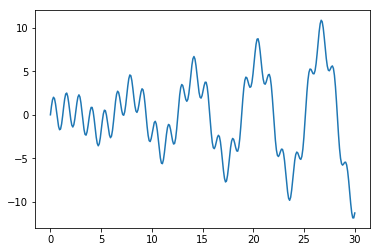

In [33]:
sample_rate=300
time=np.linspace(0., 30., sample_rate)
price=time*np.sin(time)/3+2*np.sin(5*time)
plt.plot(time,price)

In [34]:
n_steps=20
n_inputs=1
n_neurons=100
n_outputs=1

X_train= np.zeros((len(price)-n_steps,n_steps,n_inputs))
y_train= np.zeros((len(price)-n_steps,n_steps,n_inputs))
for i in range(len(price)-n_steps):
    X_train[i,]=price[i:i+n_steps].reshape(n_steps,n_inputs)
    y_train[i,]=price[i+1:i+n_steps+1].reshape(n_steps,n_inputs)
    

In [35]:
tf.reset_default_graph()
X=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y=tf.placeholder(tf.float32,[None,n_steps,n_outputs])
cell=tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu),
    output_size=n_outputs)
outputs,states=tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

learning_rate=0.001
loss=tf.reduce_mean(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)

init=tf.global_variables_initializer()

n_epochs=40
batch_size=30
n_iterations= sample_rate//batch_size


with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_train,y_train=shuffle(X_train,y_train)
        for iteration in range(n_iterations):
            X_batch=X_train[batch_size*iteration:batch_size+batch_size*iteration]
            y_batch=y_train[batch_size*iteration:batch_size+batch_size*iteration]
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
            if iteration % 10 == 0:
                mse=loss.eval(feed_dict={X:X_batch,y:y_batch})
                print("Epoch {} Iteration {} : MSE: {:6.6f}".format(epoch,iteration+n_iterations*epoch,mse),end="\r")
    X_new=X_train[100,:,:].reshape(1,20,1)
    y_pred=sess.run(outputs,feed_dict={X:X_new})

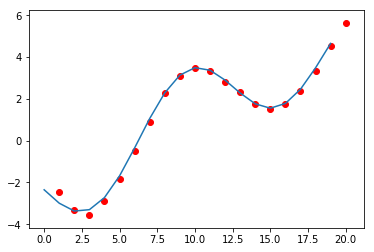

In [44]:
plt.plot(list(range(n_steps)),X_new[0])

plt.scatter(list(range(1,1+n_steps)),y_pred[0],c="r")